# Hands on session: UMAP
In this example, we explore the use of UMAP to visualize high-dimensional data. UMAP is a dimensionality reduction technique that is used for visualizing high-dimensional data. It is similar to t-SNE in that it tries to preserve the local structure of the data, but it also tries to preserve the global structure of the data. This makes it a good choice for visualizing high-dimensional data that has both local and global structure.

This exercise refers to Chapter 6 "UMAP" of the "Dimensionality reduction in neuroscience" course (tutor: Fabrizio Musacchio, Oct 17, 2024)

## Acknowledgements:
The dataset used here is extracted from the the datasets available in the [openTSEN package](https://opentsne.readthedocs.io/en/stable/examples/01_simple_usage/01_simple_usage.html). Specifically, it is the Macosko 2015 mouse retina data set. 

## Environment setup
For reproducibility:

```bash
conda create -n dimredcution python=3.11 mamba -y
conda activate dimredcution
mamba install -y ipykernel matplotlib numpy scipy scikit-learn umap-learn
```

Let's start by importing the necessary libraries:

In [1]:
# %% IMPORTS
import os
import gzip
import pickle
import matplotlib.pyplot as plt
import numpy as np

import umap

from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA


# set global properties for all plots:
plt.rcParams.update({'font.size': 14})
plt.rcParams["axes.spines.top"]    = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"]   = False
plt.rcParams["axes.spines.right"]  = False

/Users/husker/miniforge3/envs/dimredcution/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Define the path to the data file:

In [2]:
# %% DEFINE PATHS
DATA_PATH = '../data/'
DATA_FILENAME = 'macosko_2015.pkl.gz'
DATA_FILE = os.path.join(DATA_PATH, DATA_FILENAME)

RESULTSPATH = '../results/'
# check whether the results path exists, if not, create it:
if not os.path.exists(RESULTSPATH):
    os.makedirs(RESULTSPATH)

Load the data:

In [3]:
# %% LOAD DATA
with gzip.open(DATA_FILE, "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]

# convert y to a sequence of numbers:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["CellType2"])
y = data["CellType1"].astype(str)

print(f"The RNA data set (x) contains {x.shape[0]} samples with {x.shape[1]} features")
print(f"y has shape {y.shape} with unique values: {np.unique(y)}")

The RNA data set (x) contains 44808 samples with 50 features
y has shape (44808,) with unique values: ['Amacrine cells' 'Astrocytes' 'Bipolar cells' 'Cones' 'Fibroblasts'
 'Horizontal cells' 'Microglia' 'Muller glia' 'Pericytes'
 'Retinal ganglion cells' 'Rods' 'Vascular endothelium']


For our later plots, we again define an according color dictionary:

In [4]:
# decipher the cell types and create an appropriate color-label array:
MACOSKO_COLORS = {
    "Amacrine cells": "#A5C93D",
    "Astrocytes": "#8B006B",
    "Bipolar cells": "#2000D7",
    "Cones": "#538CBA",
    "Fibroblasts": "#8B006B",
    "Horizontal cells": "#B33B19",
    "Microglia": "#8B006B",
    "Muller glia": "#8B006B",
    "Pericytes": "#8B006B",
    "Retinal ganglion cells": "#C38A1F",
    "Rods": "#538CBA",
    "Vascular endothelium": "#8B006B",
}

# Map the cell types in y to their corresponding colors
colors_array = [MACOSKO_COLORS[cell_type] for cell_type in y]

## 📝 Perform UMAP
using the following parameters:
- n_components=2
- n_neighbors=15
- min_dist=0.1
- metric='euclidean'
- random_state=42

In [6]:
# Your code goes here:

# define the UMAP model:
# umap_model = ...

# fit the model:
# ...

# SOL:
# define the UMAP model:
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)

# fit the model:
embedding_umap = umap_model.fit_transform(x)


/Users/husker/miniforge3/envs/dimredcution/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Compare the processing time of UMAP with t-SNE: What do you notice?

## 📝 Plot the results
Plot the UMAP results using the color dictionary defined above. 

To assign the cell types to the clusters, you can use the following code snippet:

```python
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label)
           for label, color in MACOSKO_COLORS.items()]
plt.legend(handles=handles, title="Cell Types", bbox_to_anchor=(1.05, 1), loc='upper left')
```

Compare the UMAP results with the t-SNE results. What do you notice?

/var/folders/zm/449byhrj6kd2779zy8fs0nvr0000gq/T/ipykernel_7363/2648790775.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=1, cmap='tab20', c = colors_array, alpha=0.6)


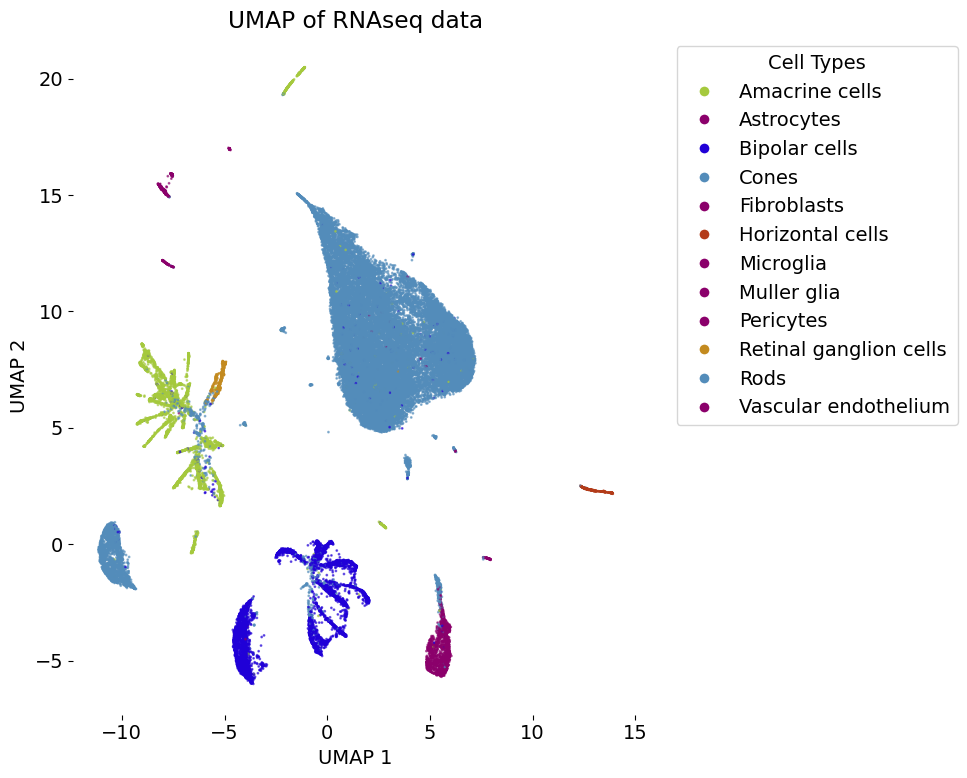

In [7]:
# Your code goes here:

# SOL:
# plot the results:
plt.figure(figsize=(10, 8))
plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=1, cmap='tab20', c = colors_array, alpha=0.6)
plt.title('UMAP of RNAseq data')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
# add a 'colorbar' that matches the cell types:
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label)
           for label, color in MACOSKO_COLORS.items()]
plt.legend(handles=handles, title="Cell Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(RESULTSPATH, 'umap_RNAseq_data.png'), dpi=300)

As for t-SNE, different metrics can be used for UMAP. Available metrics are:

- euclidean
- manhattan
- chebyshev
- minkowski
- canberra
- braycurtis
- mahalanobis
- wminkowski
- seuclidean
- cosine
- correlation
- haversine
- hamming
- jaccard
- dice
- russelrao
- kulsinski
- ll_dirichlet
- hellinger
- rogerstanimoto
- sokalmichener
- sokalsneath
- yule

## 📝 Define the UMAP model with cosine metric
1. Fit the model with the data.
2. Plot the results.

/Users/husker/miniforge3/envs/dimredcution/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(angular_rp_forest=True, metric='cosine', n_jobs=1, random_state=42, verbose=True)
Wed Oct 23 00:39:16 2024 Construct fuzzy simplicial set
Wed Oct 23 00:39:16 2024 Finding Nearest Neighbors
Wed Oct 23 00:39:16 2024 Building RP forest with 16 trees
Wed Oct 23 00:39:16 2024 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	Stopping threshold met -- exiting after 5 iterations
Wed Oct 23 00:39:22 2024 Finished Nearest Neighbor Search
Wed Oct 23 00:39:22 2024 Construct embedding


Epochs completed:   2%| ▏          3/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  11%| █          22/200 [00:02]

	completed  20  /  200 epochs


Epochs completed:  22%| ██▏        43/200 [00:05]

	completed  40  /  200 epochs


Epochs completed:  31%| ███        62/200 [00:07]

	completed  60  /  200 epochs


Epochs completed:  41%| ████       82/200 [00:09]

	completed  80  /  200 epochs


Epochs completed:  51%| █████      102/200 [00:12]

	completed  100  /  200 epochs


Epochs completed:  61%| ██████     122/200 [00:15]

	completed  120  /  200 epochs


Epochs completed:  71%| ███████    142/200 [00:17]

	completed  140  /  200 epochs


Epochs completed:  81%| ████████   162/200 [00:20]

	completed  160  /  200 epochs


Epochs completed:  91%| █████████  182/200 [00:22]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:25]
/var/folders/zm/449byhrj6kd2779zy8fs0nvr0000gq/T/ipykernel_7363/862269449.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_umap_cos[:, 0], embedding_umap_cos[:, 1], s=1, cmap='tab20', c = colors_array, alpha=0.6)


Wed Oct 23 00:39:50 2024 Finished embedding


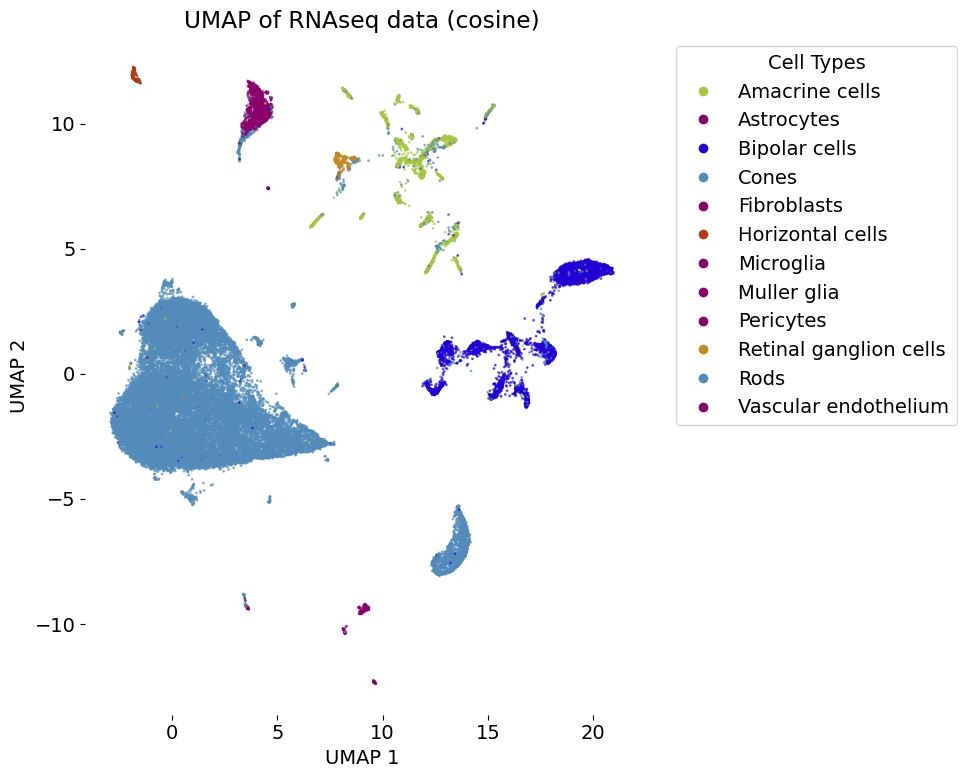

In [8]:
# Your code goes here:

# SOL:
umap_cos = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42,
                     verbose=True)

# fit the model:
embedding_umap_cos = umap_cos.fit_transform(x)

# plot the results:
plt.figure(figsize=(10, 8))
plt.scatter(embedding_umap_cos[:, 0], embedding_umap_cos[:, 1], s=1, cmap='tab20', c = colors_array, alpha=0.6)
plt.title('UMAP of RNAseq data (cosine)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
# add a 'colorbar' that matches the cell types:
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label)
           for label, color in MACOSKO_COLORS.items()]
plt.legend(handles=handles, title="Cell Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(RESULTSPATH, 'umap_RNAseq_data_cosine.png'), dpi=300)
plt.show()

## 📝 Define the UMAP model with manhattan metric
1. Fit the model with the data.
2. Plot the results.

/Users/husker/miniforge3/envs/dimredcution/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(metric='manhattan', n_jobs=1, random_state=42, verbose=True)
Wed Oct 23 00:41:30 2024 Construct fuzzy simplicial set
Wed Oct 23 00:41:30 2024 Finding Nearest Neighbors
Wed Oct 23 00:41:30 2024 Building RP forest with 16 trees
Wed Oct 23 00:41:30 2024 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	Stopping threshold met -- exiting after 5 iterations
Wed Oct 23 00:41:35 2024 Finished Nearest Neighbor Search
Wed Oct 23 00:41:35 2024 Construct embedding


Epochs completed:   2%| ▏          4/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  11%| █          22/200 [00:02]

	completed  20  /  200 epochs


Epochs completed:  22%| ██▏        43/200 [00:05]

	completed  40  /  200 epochs


Epochs completed:  32%| ███▏       63/200 [00:07]

	completed  60  /  200 epochs


Epochs completed:  42%| ████▏      83/200 [00:10]

	completed  80  /  200 epochs


Epochs completed:  51%| █████      102/200 [00:12]

	completed  100  /  200 epochs


Epochs completed:  60%| ██████     121/200 [00:14]

	completed  120  /  200 epochs


Epochs completed:  72%| ███████▏   143/200 [00:17]

	completed  140  /  200 epochs


Epochs completed:  81%| ████████   162/200 [00:19]

	completed  160  /  200 epochs


Epochs completed:  91%| █████████  182/200 [00:21]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:24]
/var/folders/zm/449byhrj6kd2779zy8fs0nvr0000gq/T/ipykernel_7363/599245445.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_umap_man[:, 0], embedding_umap_man[:, 1], s=1, cmap='tab20', c = colors_array, alpha=0.6)


Wed Oct 23 00:42:02 2024 Finished embedding


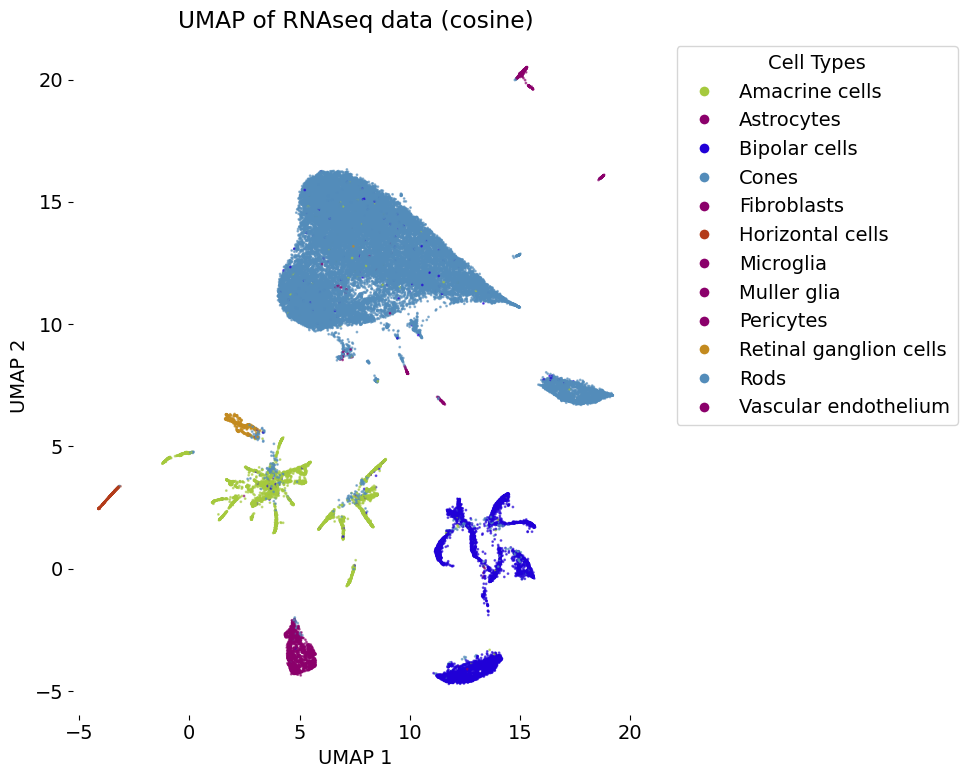

In [9]:
# Your code goes here:


# SOL:
umap_man = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='manhattan', random_state=42,
                     verbose=True)

# fit the model:
embedding_umap_man = umap_man.fit_transform(x)

# plot the results:
plt.figure(figsize=(10, 8))
plt.scatter(embedding_umap_man[:, 0], embedding_umap_man[:, 1], s=1, cmap='tab20', c = colors_array, alpha=0.6)
plt.title('UMAP of RNAseq data (cosine)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
# add a 'colorbar' that matches the cell types:
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label)
           for label, color in MACOSKO_COLORS.items()]
plt.legend(handles=handles, title="Cell Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(RESULTSPATH, 'umap_RNAseq_data_manhattan.png'), dpi=300)
plt.show()

## 📝 Play further with the UMAP parameters and metrics
Freely explore the UMAP parameters and metrics. 
1. Play with
   - different metrics
   - change the number of neighbors
   - change the minimum distance
2. Plot the results.

## 📝 Compare the results of the different UMAP models. What do you notice?

# Your answer goes here: